In [2]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import Bio
print(Bio.__version__)

sns.set(style='whitegrid')

1.85


In [31]:
sequences = []
for seq_record in SeqIO.parse("/content/gene.fna", "fasta"):
    sequences.append(str(seq_record.seq))

df = pd.DataFrame(sequences, columns=['sequence'])
df.head()

,sequence
0,CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGC...
1,CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGC...


In [42]:
def split_sequence(sequence, length):
  return [sequence[i:i + length] for i in range(0, len(sequence), length)]

sequences =[]
for sew_record in SeqIO.parse('gene.fna','fasta'):
  sequences.append(str(sew_record.seq))

sequence = sequences[0]
segment_length = 100  # Set your desired segment length
segments = split_sequence(sequence, segment_length)
df= pd.DataFrame(segments, columns=['segment'])
df.head()

,segment
0,CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGC...
1,CTTCCCTGGATTGGGTAAGCTCCTGACTGAACTTGATGAGTCCTCT...
2,CTGGGGGTGGGGCAGTGGGGACTTAGCGAGTTTGGGGGTGAGTGGG...
3,GTGTAGATGATGGGGATGTTAGGACCATCCGAACTCAAAGTTGAAC...
4,TCTTTGCACATCCACCCGGTGCTGGGCGTAGGGAATCCCTGAAATA...


In [45]:
df['sequence_length'] = df['segment'].apply(len)
df['sequence_length'].describe()

,sequence_length
count,191.000000
mean,99.842932
std,2.170724
min,70.000000
25%,100.000000
50%,100.000000
75%,100.000000
max,100.000000


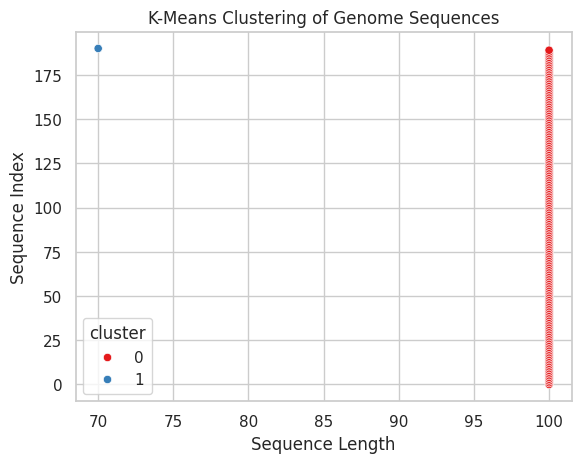

In [46]:
X = df['sequence_length'].values.reshape(-1, 1)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

kmeans = KMeans (n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(data=df, x='sequence_length', y=df.index, hue='cluster', palette='Set1')
plt.xlabel('Sequence Length')
plt.ylabel('Sequence Index')
plt.title('K-Means Clustering of Genome Sequences')
plt.show()

In [47]:
df['label'] = np.random.randint(0, 2, df.shape[0])

X = df['sequence_length'].values.reshape(-1, 1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


SVM Accuracy: 0.5384615384615384
Confusion Matrix:
 [[21  0]
 [18  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70        21
           1       0.00      0.00      0.00        18

    accuracy                           0.54        39
   macro avg       0.27      0.50      0.35        39
weighted avg       0.29      0.54      0.38        39



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['segment'])

X_seq = tokenizer.texts_to_sequences(df['segment'])

max_length = 100
X_padded = pad_sequences(X_seq, maxlen=max_length)

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length))
lstm_model.add(LSTM(100, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.5101 - loss: 0.6944 - val_accuracy: 0.4839 - val_loss: 0.6924
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5415 - loss: 0.6921 - val_accuracy: 0.4839 - val_loss: 0.6930
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5581 - loss: 0.6897 - val_accuracy: 0.4839 - val_loss: 0.6941
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.5821 - loss: 0.6844 - val_accuracy: 0.4839 - val_loss: 0.6963
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.5613 - loss: 0.6840 - val_accuracy: 0.4839 - val_loss: 0.7010
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5748 - loss: 0.6815 - val_accuracy: 0.4839 - val_loss: 0.7049
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5133 - loss: 0.6983 - val_accuracy: 0.4839 - val_loss: 0.7011
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5425 - loss: 0.6873 - val_accuracy: 0.4839 - val_loss: 0.

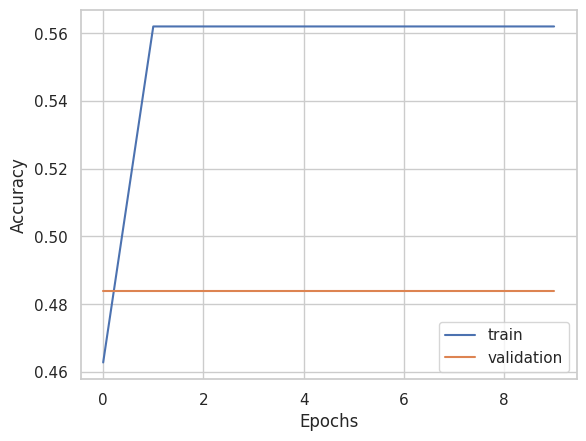

In [50]:
history_lstm = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32,validation_split=0.2, verbose=1)

loss, accuracy = lstm_model.evaluate(X_test, y_test)
print (f"LSTM Model Accuracy: {accuracy}")

plt.plot(history_lstm.history['accuracy'], label='train')
plt.plot(history_lstm.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()